### Destination recommendation system 

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [34]:
plt.rcParams['figure.figsize'] = [15,8]

In [35]:
df_review = pd.read_csv('/Users/karmesh/Downloads/google_review_ratings.csv')
df_review.head(17)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.60,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,...,0.60,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,...,0.59,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN


In [36]:
# Renaming the columns for better understanding
column_names = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens','Unnamed: 25']
df_review.columns = column_names

In [37]:
df_review.head(17)

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,...,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,0.60,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,...,0.60,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,...,0.59,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN


# EDA

In [38]:
# checking the dimensions of the data 
df_review.shape

(5456, 26)

#### Interpretation :  The dataset has 5456 observations and 26 features

In [39]:
# checking for the datatypes 
df_review.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
Unnamed: 25              float64
dtype: object

- **There are two categorical variable and 24numeric features. One of the numeric feature(local_services) is identified as object, so let's convert it.**

In [40]:
df_review['local_services'].value_counts()

local_services
5        1046
1.56       80
1.58       75
1.76       67
1.75       66
         ... 
3.84        1
2\t2.       1
3.82        1
3.18        1
3.54        1
Name: count, Length: 296, dtype: int64

In [41]:
df_review['local_services'][df_review['local_services'].index == 2712]

2712    2\t2.
Name: local_services, dtype: object

In [42]:
df_review['local_services'][df_review['local_services'] == '2\t2.']

2712    2\t2.
Name: local_services, dtype: object

In [43]:
df_review['local_services'] = df_review['local_services'].replace('2\t2.',2)

In [44]:
df_review['local_services'] = pd.to_numeric(df_review['local_services'])

In [45]:
df_review.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
Unnamed: 25              float64
dtype: object

- **All the variables are indentified correctly now.**

In [46]:
df_review.describe(include='all')

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
count,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
unique,5456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,NaN,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,NaN,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,NaN,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000


-**There are 5456 unique values for the feature User which is insignificant and can be removed.**

In [47]:
#checking for duplicates in dataset
df_review[df_review.duplicated()]

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25


#### Interpretation : No duplicate values in our dataset

In [48]:
# Checking for missing values

In [49]:
Total = df_review.isnull().sum().sort_values(ascending=False)          

Percent = (df_review.isnull().sum()*100/df_review.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 25,5454,99.963343
gardens,1,0.018328
burger_pizza_shops,1,0.018328
juice_bars,0,0.000000
monuments,0,0.000000
view_points,0,0.000000
cafes,0,0.000000
beauty_spas,0,0.000000
bakeries,0,0.000000
gyms,0,0.000000


#### Interpretation : There is only 0.01 % of missing values for gardens and burger_pizza_shops. However there are around 99.9 % of missing values for the variable Unnamed: 25 and hence  can be removed completely.

In [50]:
# Missing value treatment

In [51]:
# Removing insificicant variable
df_review.drop('Unnamed: 25',axis=1,inplace=True)
df_review.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [52]:
df_review['gardens'].mean()

1.560755270394134

In [53]:
df_review['gardens'].replace(np.nan,df_review['gardens'].mean(),inplace=True)

In [54]:
df_review['burger_pizza_shops'].mean()

2.078339138405133

In [55]:
df_review['burger_pizza_shops'].replace(np.nan,df_review['burger_pizza_shops'].mean(),inplace=True)

In [56]:
Total = df_review.isnull().sum().sort_values(ascending=False)          

Percent = (df_review.isnull().sum()*100/df_review.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
User,0,0.0
hotels_other_lodgings,0,0.0
monuments,0,0.0
view_points,0,0.0
cafes,0,0.0
beauty_spas,0,0.0
bakeries,0,0.0
gyms,0,0.0
swimming_pools,0,0.0
dance_clubs,0,0.0


#### Interpretation : Missing values are been treated.

In [57]:
df = df_review.copy()

In [58]:
df_review = df_review.drop(['User'], axis=1)

In [59]:
# Checking for outliers and treating them 

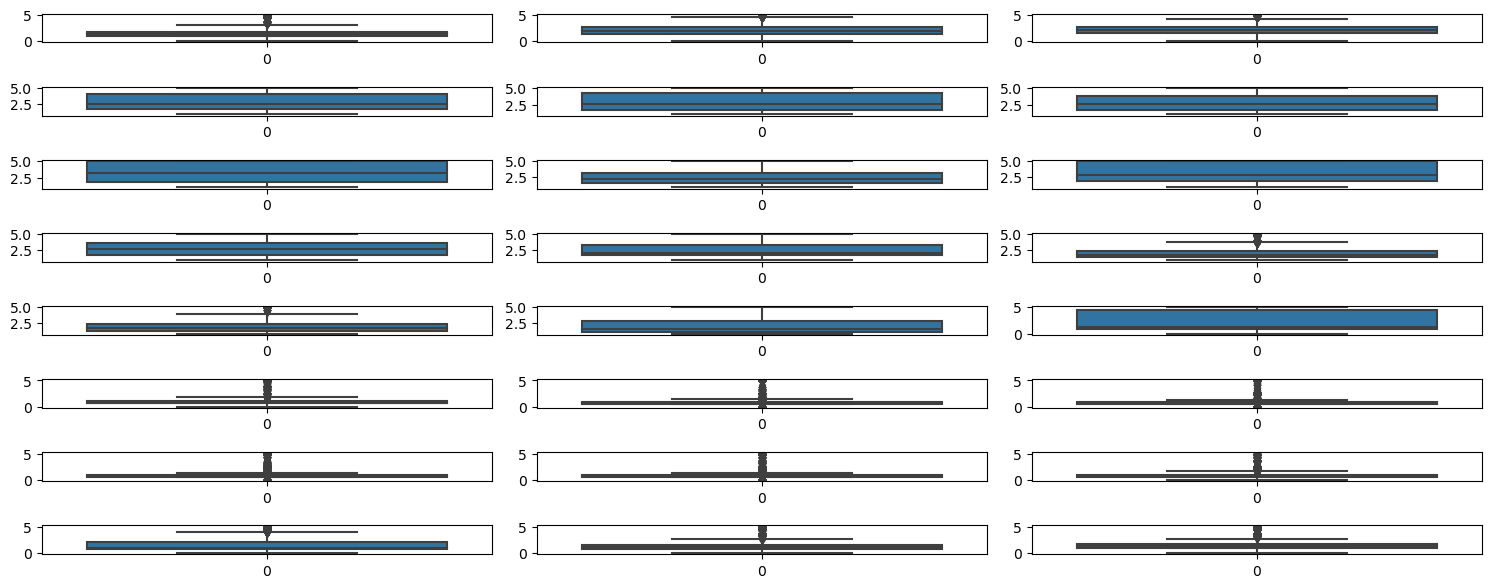

In [60]:
fig, ax = plt.subplots(nrows = 8, ncols = 3, figsize=(15, 6))

plt.tight_layout()

for variable, subplot in zip(df_review.columns, ax.flatten()):
    
 
    sns.boxplot(df_review[variable], ax = subplot)

# display the plot
plt.show()

- #### Interpretation:There are many outliers in Dataset and can be removed.

In [61]:
Q1 = df_review[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.25)

Q3 = df_review[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.75)

IQR = Q3-Q1

IQR

churches                 0.8900
resorts                  1.3225
beaches                  1.2000
burger_pizza_shops       0.9925
hotels_other_lodgings    1.1700
dance_clubs              0.4700
swimming_pools           0.3300
gyms                     0.3100
bakeries                 0.3400
beauty_spas              0.3200
cafes                    0.4300
view_points              1.3300
monuments                0.7700
gardens                  0.7800
dtype: float64

In [62]:
df_iqr = df_review[~((df_review < (Q1 - 1.5 * IQR)) | (df_review > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

#### Interpretation: Let consider the data with oulier values, as the number of rows are reducing very much after removing outliers.

In [63]:
df_popularity_table = pd.DataFrame(df_review.mean(),columns=['Average Rating'])
df_popularity_table['TotalRatingCount'] = df_review.astype(bool).sum(axis=0).values

In [64]:
bar = df_popularity_table.sort_values(by=['TotalRatingCount'],ascending=True)

In [65]:
df_popularity_table

,Average Rating,TotalRatingCount
churches,1.455720,5261
resorts,2.319707,5366
beaches,2.489331,5452
parks,2.796886,5456
theatres,2.958941,5456
museums,2.893490,5456
malls,3.351395,5456
zoo,2.540795,5456
restaurants,3.126019,5456
pubs_bars,2.832729,5456


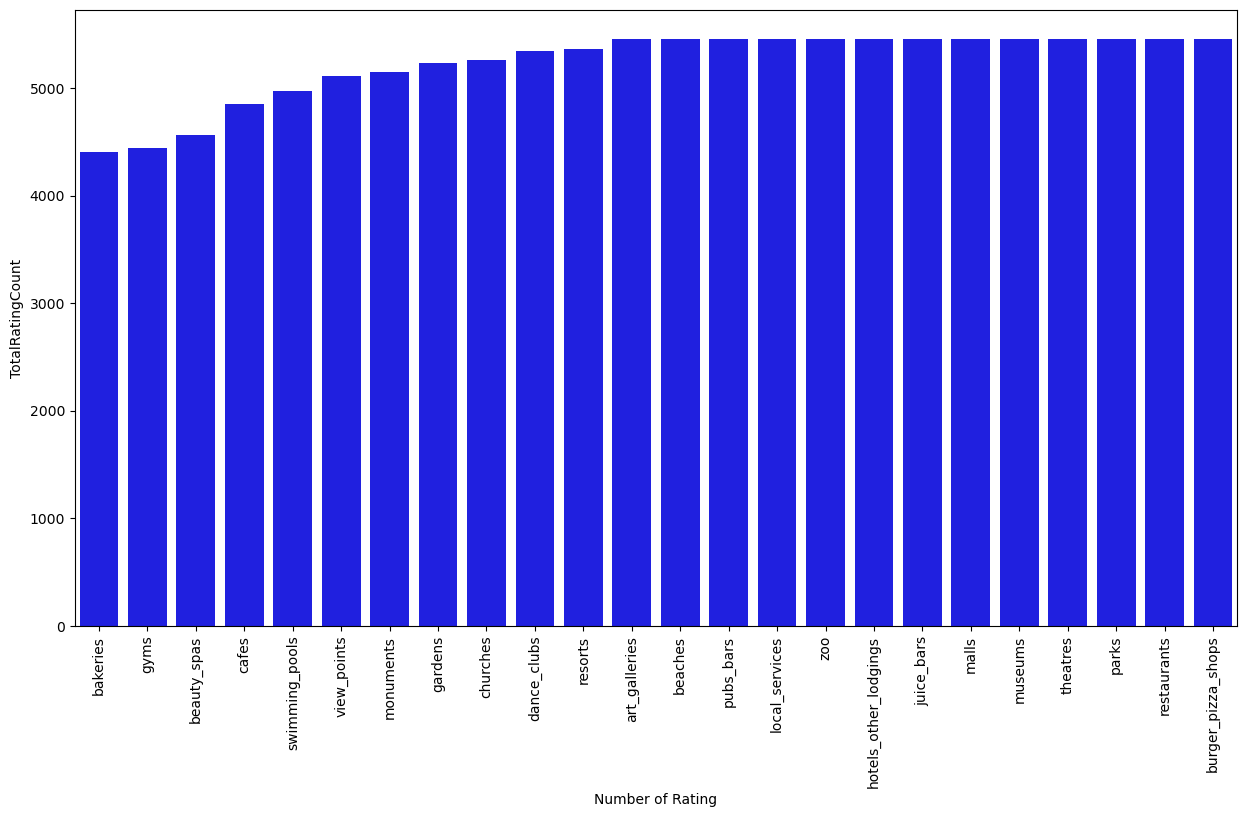

In [67]:
# Barplot based on total number of rating
plt.figure(figsize=(15,8))
sns.barplot(x=bar.index, y=bar.TotalRatingCount, color='blue')
plt.xlabel('Number of Rating')
plt.xticks(rotation=90)
plt.show()

#### Interpretation: Bakeries has least number of reviews.

In [68]:
bar = df_popularity_table.sort_values(by=['Average Rating'],ascending=True)

Text(0.5, 0, 'Average Rating')

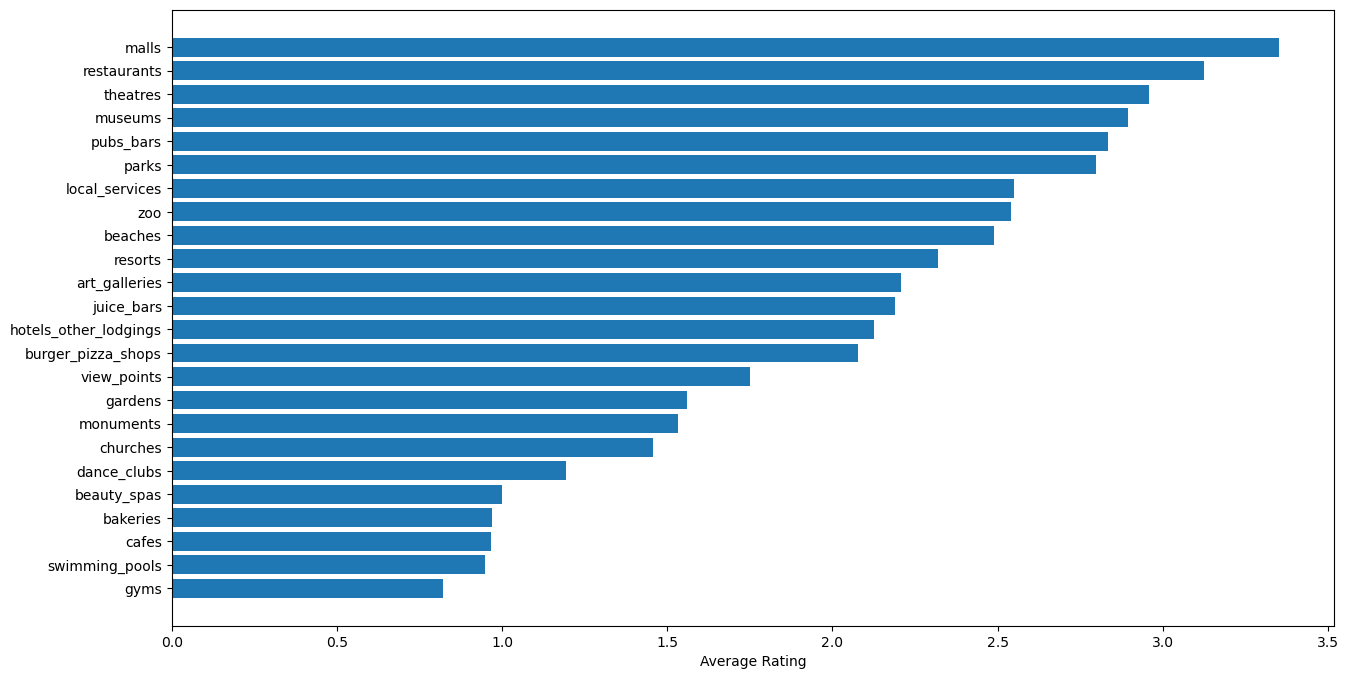

In [69]:
# Barplot based on average rating
plt.figure(figsize=(15,8))
plt.barh(bar.index, bar['Average Rating'])
plt.xlabel('Average Rating')

#### Interpretation: Malls are has highest rating and Gyms has least rating,so people prefer mall compared to gyms.

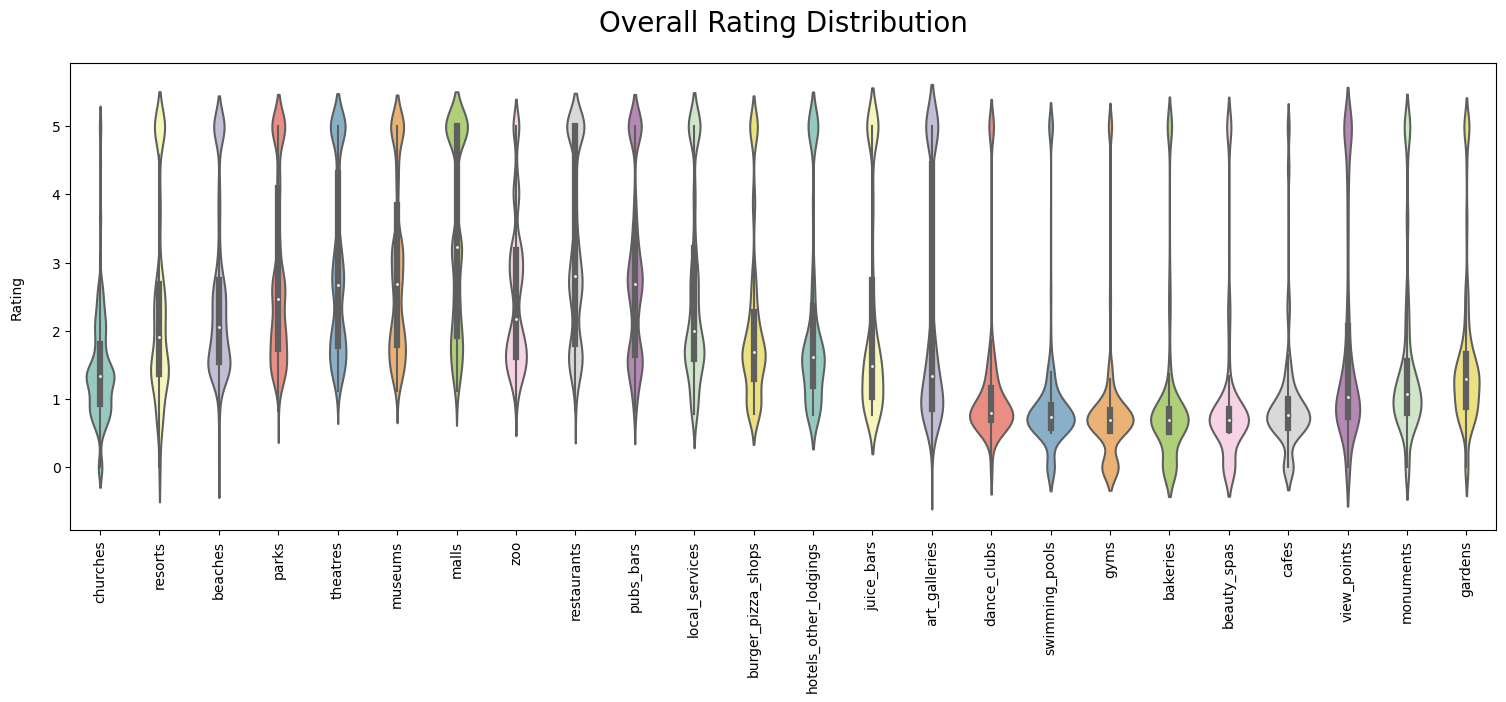

In [70]:
# Overall Rating Distribution
df_transform = pd.melt(df_review,value_vars=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'])

fig = plt.figure(figsize = (15,7))
g = sns.violinplot(x='variable',y='value',data=df_transform,palette = 'Set3')
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title(f'Overall Rating Distribution',y=1.05,fontsize=20)
g.set_xlabel("")
g.set_ylabel("Rating",labelpad = 20)
fig.tight_layout(pad = 0.5)

#### Interpretation:
- Overall rating are lying between 0.5 to 5 stars
- Some attractions have wide-range of rating distribution (suchas pubs/bars, restaurants,malls) since they are common attraction point where most of tourist must visit
- On the other hand, some attractions such as gyms, bakeries, swimming pools,beauty_spas have relatively low rating. Since most of the users might not visit often to all these places.
- Since we don't have enough information about attraction itself or descriptive user reivews, In this notebook we'll focus on segmenting user into different cluster based on their preferences

In [71]:
# Scaling the data using Standard scaler

In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = ss.fit_transform(df_review)
df_scaled = pd.DataFrame(df_scaled,columns=df_review.columns)
df_scaled.shape

(5456, 24)

In [73]:
df_scaled.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223


## PCA

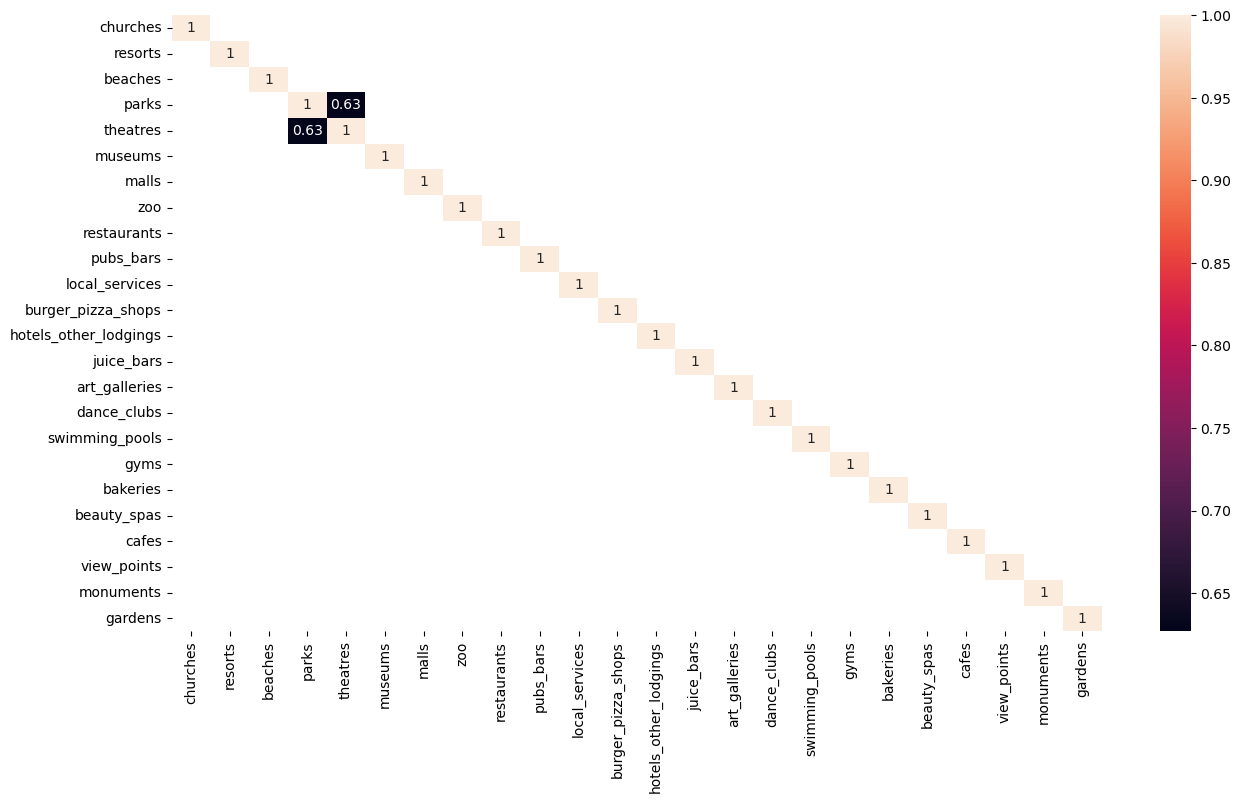

In [91]:
sns.heatmap(df_review.corr()[df_review.corr() >= 0.6],annot=True)
plt.show()

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [93]:
pca.explained_variance_  # To get the eigen values

array([4.71937538, 3.49445892, 1.84974586, 1.59783151, 1.26464842,
       1.14250103, 1.06849962, 0.99582028, 0.78408629, 0.71400281,
       0.64137521, 0.60519076, 0.57895021, 0.51687305, 0.51028157,
       0.46619429, 0.44402336, 0.43867407, 0.42938291, 0.40050874,
       0.37397306, 0.34724672, 0.33015445, 0.2906011 ])

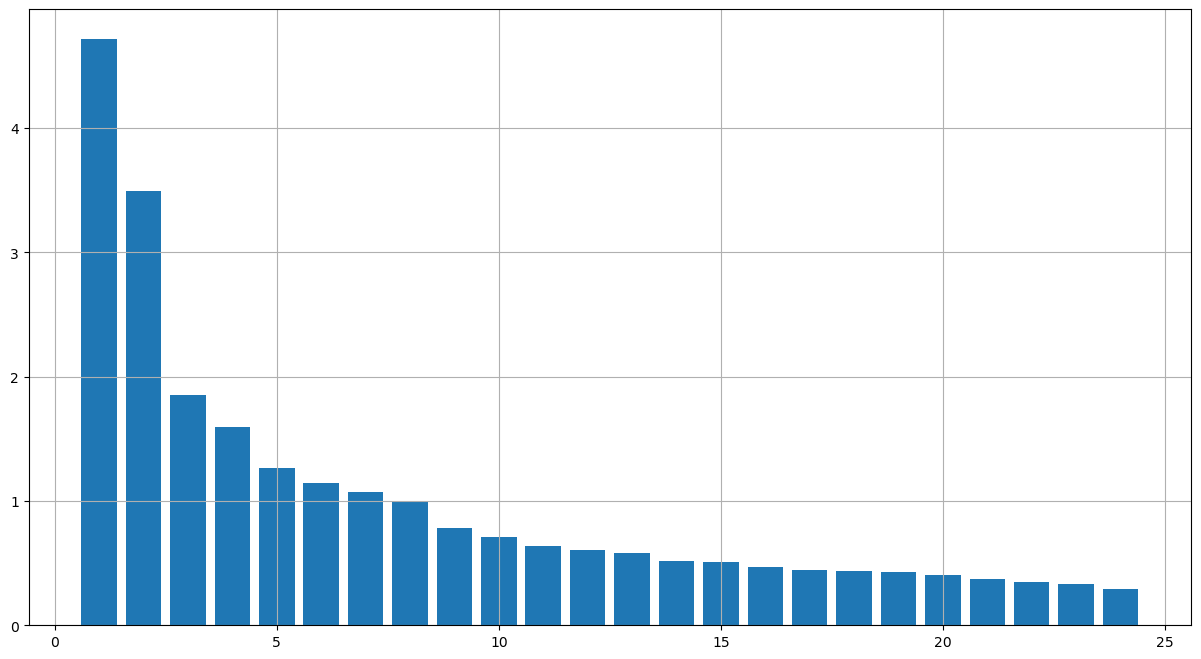

In [94]:
plt.bar(range(1,25),pca.explained_variance_)
plt.grid(True)
plt.show()

In [95]:
pca.explained_variance_ratio_  # proportion accounted

array([0.1966046 , 0.14557577, 0.07705862, 0.06656411, 0.05268403,
       0.04759548, 0.04451266, 0.04148491, 0.03266427, 0.02974466,
       0.02671907, 0.02521166, 0.0241185 , 0.02153243, 0.02125783,
       0.0194212 , 0.01849758, 0.01827474, 0.01788768, 0.01668481,
       0.01557935, 0.01446596, 0.01375391, 0.01210616])

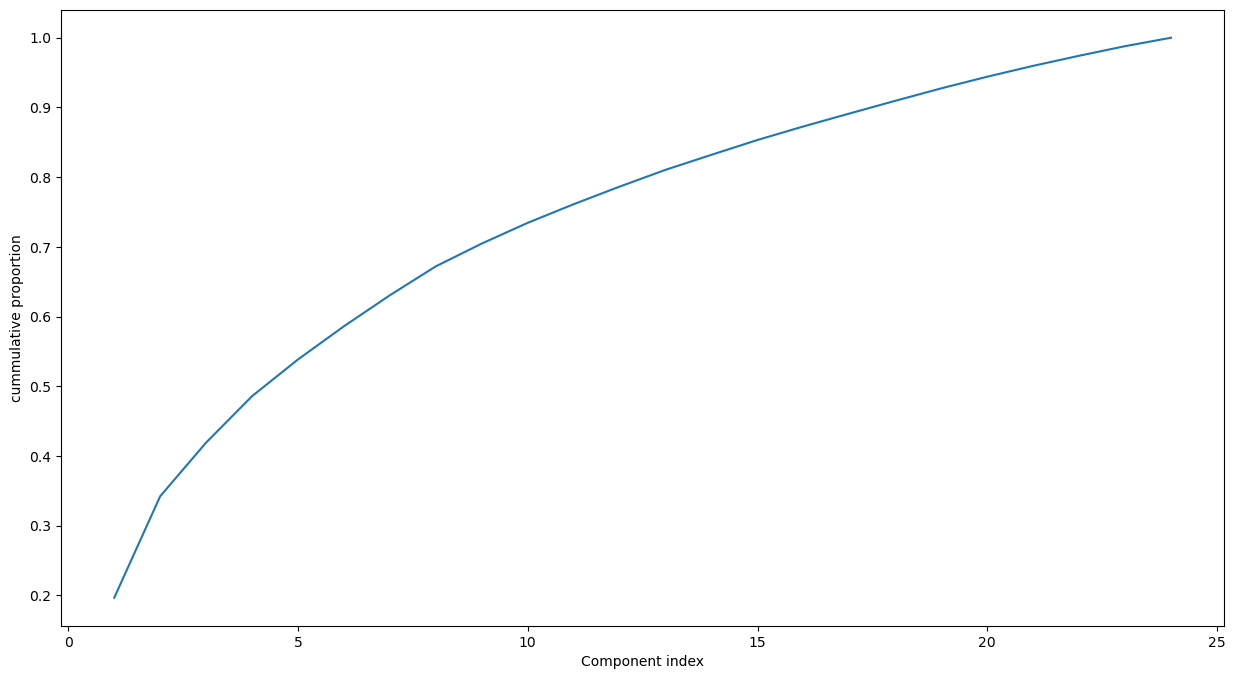

In [96]:
plt.plot(range(1,25),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component index')
plt.ylabel('cummulative proportion')
plt.show()

**Interpretation:**
- **The above output shows that 21 components are accounting for >=95 % of variation in the data.**

In [97]:
pca = PCA(0.95)
pca.fit(df_scaled)

PCA(n_components=0.95)

In [98]:
pca.explained_variance_

array([4.71937538, 3.49445892, 1.84974586, 1.59783151, 1.26464842,
       1.14250103, 1.06849962, 0.99582028, 0.78408629, 0.71400281,
       0.64137521, 0.60519076, 0.57895021, 0.51687305, 0.51028157,
       0.46619429, 0.44402336, 0.43867407, 0.42938291, 0.40050874,
       0.37397306])

In [99]:
pca.components_   # this is the eigen vector

array([[ 2.85704807e-01,  1.11081997e-01,  1.31999023e-01,
         1.09534609e-01,  5.06929108e-02, -8.22454274e-02,
        -2.59066472e-01, -2.68606780e-01, -2.97655705e-01,
        -2.91052382e-01, -2.27373962e-01, -1.77452453e-01,
        -1.45983690e-01, -1.43140618e-01, -8.82409960e-02,
         9.35039111e-02,  1.54753749e-01,  1.75563710e-01,
         1.80712096e-01,  1.93073446e-01,  2.62249274e-01,
         2.76669210e-01,  2.69003083e-01,  2.66074206e-01],
       [-4.11657710e-02, -1.46962750e-01, -2.39261104e-01,
        -3.40488989e-01, -3.76450840e-01, -3.32942997e-01,
        -1.26765334e-01, -1.24636589e-01, -5.46307101e-02,
        -5.36317582e-02,  5.13428872e-02,  2.13073291e-01,
         2.27763369e-01,  2.96155131e-01,  2.47156150e-01,
         1.12052980e-01,  2.40651195e-01,  2.85247939e-01,
         2.62344643e-01,  1.49833675e-01,  7.77275647e-02,
        -8.81103659e-02, -7.54283919e-02, -4.67629498e-02],
       [-1.63507739e-01,  7.14419808e-03,  2.28043375e

In [100]:
pca.components_.shape

(21, 24)

**Interpretation:**
- **As the Feature has just decreased to 24 to 21,Not Building a Model with PCA Components.**

# Recommendation System

## Collaborative Filtering Recommendation System.

### Approach 1: Matrix Based

In [110]:
from surprise import Dataset,Reader
from surprise import SVDpp

In [112]:
# This line creates a new DataFrame by setting the index to include the 'User' column, then stacks the DataFrame, 
# and finally resets the index. It renames the stacked column as 'rating' and the second level index as 'Category', 
# and drops the first level index column.
df_coll_filt_data = df.set_index('User', append=True).stack().reset_index().rename(columns={0:'rating', 'level_2':'Category'}).drop(columns=['level_0'])
df_coll_filt_data .head(30)

,User,Category,rating
0,User 1,churches,0.00
1,User 1,resorts,0.00
2,User 1,beaches,3.63
3,User 1,parks,3.65
4,User 1,theatres,5.00
5,User 1,museums,2.92
6,User 1,malls,5.00
7,User 1,zoo,2.35
8,User 1,restaurants,2.33
9,User 1,pubs_bars,2.64


In [113]:
# dataset info
df_coll_filt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130944 entries, 0 to 130943
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User      130944 non-null  object 
 1   Category  130944 non-null  object 
 2   rating    130944 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [114]:
# This line creates a Reader object specifying the rating scale from 1 to 5.
reader = Reader(rating_scale=(1,5))  # rating scale

In [115]:
# This line loads the DataFrame into a Dataset object, only including the 'User', 'Category', and 'rating' columns.
rating_data = Dataset.load_from_df(df_coll_filt_data[['User','Category','rating']],reader)

In [116]:
# This line builds the full training set from the rating data.
trainsetfull = rating_data.build_full_trainset()
print('Number of user:',trainsetfull.n_users)
print('Number of items:',trainsetfull.n_items)

Number of user: 5456
Number of items: 24


In [117]:
# This line initializes the SVD++ algorithm with a random state of 4.
algo = SVDpp(random_state=4)  

# This line fits the algorithm to the training data.
algo.fit(trainsetfull)

In [118]:
# This line creates a list of unique item IDs.
item_id = df_coll_filt_data['Category'].unique()
item_id

array(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms',
       'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments',
       'gardens'], dtype=object)

In [119]:
# This line creates a test set, where each entry is a list containing 'User 50', an item ID, and a rating of 4.
test_set = [['User 50', iid, 4] for iid in item_id]
test_set = [['User 50',iid,4] for iid in item_id]
test_set

[['User 50', 'churches', 4],
 ['User 50', 'resorts', 4],
 ['User 50', 'beaches', 4],
 ['User 50', 'parks', 4],
 ['User 50', 'theatres', 4],
 ['User 50', 'museums', 4],
 ['User 50', 'malls', 4],
 ['User 50', 'zoo', 4],
 ['User 50', 'restaurants', 4],
 ['User 50', 'pubs_bars', 4],
 ['User 50', 'local_services', 4],
 ['User 50', 'burger_pizza_shops', 4],
 ['User 50', 'hotels_other_lodgings', 4],
 ['User 50', 'juice_bars', 4],
 ['User 50', 'art_galleries', 4],
 ['User 50', 'dance_clubs', 4],
 ['User 50', 'swimming_pools', 4],
 ['User 50', 'gyms', 4],
 ['User 50', 'bakeries', 4],
 ['User 50', 'beauty_spas', 4],
 ['User 50', 'cafes', 4],
 ['User 50', 'view_points', 4],
 ['User 50', 'monuments', 4],
 ['User 50', 'gardens', 4]]

In [120]:
# This line generates predictions for the test set using the trained algorithm.
pred = algo.test(test_set)

In [123]:
# This line converts the predictions into a DataFrame and sorts it by estimated rating in descending order.
rec = pd.DataFrame(pred).sort_values(by='est',ascending=False)
rec.head(5)

,uid,iid,r_ui,est,details
21,User 50,view_points,4,3.985716,{'was_impossible': False}
2,User 50,beaches,4,3.354185,{'was_impossible': False}
22,User 50,monuments,4,3.267731,{'was_impossible': False}
1,User 50,resorts,4,3.224506,{'was_impossible': False}
0,User 50,churches,4,2.675006,{'was_impossible': False}


**Interpretation:**
- **For a User Number 50, Top 5 place he/she can visits are viewpoints,beaches,monuments,resorts,churches.**

### Evaluating the Model

In [124]:
# Importing the train_test_split function from the surprise.model_selection module
from surprise.model_selection import train_test_split
#spliting train and test dataset
[trainset,testset] = train_test_split(rating_data,test_size=0.3,random_state=4)
# Initializing the SVD++ algorithm with a random state of 4.
algo = SVDpp(random_state=4)
algo.fit(trainset)

In [125]:
# Generating predictions for the test set using the trained algorithm.
test_pred= algo.test(testset)

In [126]:
# Converting the predictions into a pandas DataFrame.
tp = pd.DataFrame(test_pred)
tp.head()

,uid,iid,r_ui,est,details
0,User 3942,theatres,5.00,3.408195,{'was_impossible': False}
1,User 2108,beauty_spas,0.73,1.504572,{'was_impossible': False}
2,User 3445,burger_pizza_shops,0.92,1.634615,{'was_impossible': False}
3,User 2314,swimming_pools,0.53,1.000000,{'was_impossible': False}
4,User 479,juice_bars,1.46,1.776674,{'was_impossible': False}


In [127]:
# Importing the mean_squared_error function from sklearn.metrics module.
from sklearn.metrics import mean_squared_error
# Calculating the root mean squared error (RMSE) between the actual ratings (r_ui) and the estimated ratings (est).
rmse = np.sqrt(mean_squared_error(tp['r_ui'],tp['est']))
print('RMSE on Test',rmse)

RMSE on Test 1.1227257650081424
